In [1]:
import csv
import pandas as pd
import numpy as np
import json

csv.field_size_limit(100000000)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.dates as mdates
import matplotlib.ticker as tick

pd.options.display.float_format = '{:.4f}'.format

In [2]:
#Labels
TweetsCov19_labels = ['Tweet_Id', 'Username', 'Timestamp', 'Followers', 'Followees', 'Retweets', 'Favorites', 'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs', 'Text', 'Is_deleted', 'Number of Mentions', 'Number of Hashtags', 'Number of URLS', 'Domains', 'Textlength', 'Readability','Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound', 'Emojis', 'Number of Emojis',  'Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_average', 'Number of valued Emojis']
TweetsKB_labels    = ['Tweet_Id', 'Username', 'Timestamp', 'Followers', 'Followees', 'Retweets', 'Favorites', 'Text', 'URLs', 'Is_deleted', 'Hashtags', 'Mentions', 'Number of Hashtags', 'Number of Mentions', 'Textlength', 'Readability', 'Domains', 'Number of URLs', 'Vader_pos', 'Vader_neu', 'Vader_neg', 'Vader_com' , 'Emojis', 'Number of Emojis','Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_average', 'Number of valued Emojis']
#Path
TweetsCov19_Pfad =  '../data/TweetsCov19_stichprobe_final.tsv'
TweetsKB_Pfad =  '../data/Tweetskb_stichprobe_final.tsv'

In [13]:
#Dataframe TweetsCov19 
df_tweetscov19 = pd.read_csv(TweetsCov19_Pfad, sep='\t', error_bad_lines=False, names=TweetsCov19_labels)
print('Form', df_tweetscov19.shape)
df_tweetscov19.head()

Form (9409841, 31)


,Tweet_Id,Username,Timestamp,Followers,Followees,Retweets,Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,Text,Is_deleted,Number of Mentions,Number of Hashtags,Number of URLS,Domains,Textlength,Readability,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Emojis,Number of Emojis,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_average,Number of valued Emojis
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,2019-09-30 22:00:01+00:00,764191,132,19,180,foodie:Foodie:-2.096663959988218;,1 -1,null;,HalloweenTime?,null;,Has your appetite materialized just as fast as...,True,0,1,0,0,155,76.5530,-0.0000,1.0000,0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
1,1178791641601232896,627f7d4ef584ba33a676a4ebcb861cdb,2019-09-30 22:00:02+00:00,321189,26833,32,43,mainland china:Mainland_China:-1.6252666161640...,1 -1,null;,HongKong,https://www.catholicnewsagency.com/news/amid-h...,The persecution of Catholics in mainland China...,False,0,1,1,catholicnewsagency.com,204,29.4680,-0.0000,0.9190,0.0810,0.3182,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
2,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,2019-09-30 22:00:03+00:00,14209,10623,90,182,brexit:Brexit:-1.582809637810362;hear hear:Hea...,1 -2,null;,Brexit,null;,"Hear, hear..\nEmily: You were an outspoken cri...",False,0,1,0,0,163,79.5340,-0.2020,0.7980,0.0000,-0.6486,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
3,1178791644214235137,f17996c036ed4cd981f5448fe00d9ed2,2019-09-30 22:00:03+00:00,2264986,655,60,528,null;,3 -1,amstandardca.,BlueJays,null;,We wrapped up the season with a WINNING week! ...,False,1,1,0,0,132,85.8890,-0.0000,0.6240,0.3760,0.8633,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
4,1178791645371875329,32a54e5f6d8a67de1bffd2e689594dc8,2019-09-30 22:00:03+00:00,171,138,33,117,my family:My_Family:-2.6353832182503094;roll t...,4 -1,null;,null;,null;,Super excited to announce that I will be spend...,False,0,0,0,0,257,61.2030,-0.0000,0.7650,0.2350,0.9117,"['🐘', '🔴']",2,-0.0150,0.2650,0.2200,0.2235,2.0000


In [14]:
df_del_cov19 = df_tweetscov19[df_tweetscov19['Is_deleted'] == True]
df_undel_cov19 = df_tweetscov19[df_tweetscov19['Is_deleted'] == False]

In [3]:
#Dataframe TweetsKB 
df_tweetskb = pd.read_csv(TweetsKB_Pfad, sep='\t', error_bad_lines=False, names=TweetsKB_labels)
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (9409841, 29)


,Tweet_Id,Username,Timestamp,Followers,Followees,Retweets,Favorites,Text,URLs,Is_deleted,Hashtags,Mentions,Number of Hashtags,Number of Mentions,Textlength,Readability,Domains,Number of URLs,Vader_pos,Vader_neu,Vader_neg,Vader_com,Emojis,Number of Emojis,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_average,Number of valued Emojis
0,1178791636039589889,DCComics,2019-09-30 22:00:01+00:00,3349606,563,2,13,"Today on #DCDaily, the crew takes a deep dive ...",http://bit.ly/2mlNYpS:-:,False,['DCDaily'],['DCUTitans'],1,1,192,70.3500,dcuniverseinfinite.com,1,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
1,1178791641265639424,seanberdyz,2019-09-30 22:00:02+00:00,1203,499,4,20,𝘪’𝘮 𝘨𝘰𝘯𝘯𝘢 𝘣𝘦 𝘳𝘪𝘨𝘩𝘵 𝘩𝘦𝘳𝘦 ⟶ https://t.co/kOxWQL5...,http://ourownside.carrd.co:-:,True,[],[],0,0,73,82.3900,carrd.co,1,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
2,1178791640573579264,AnArtistAtBirth,2019-09-30 22:00:02+00:00,109,215,0,0,❛ 𝘠𝘰𝘶'𝘳𝘦 𝘴𝘪𝘵𝘵𝘪𝘯' 𝘰𝘯 𝘺𝘰𝘶𝘳 𝘧𝘦𝘦𝘭𝘪𝘯𝘨𝘴 . . . 𝘐'𝘮 𝘴𝘪...,null;,True,['𝘛𝘩𝘦𝘰𝘯𝘦'],[],1,0,128,123.7550,0,0,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
3,1178791644797255680,lagosboygang,2019-09-30 22:00:03+00:00,571,1401,0,0,@Tiffany_o_ @UG_derrick That's the one i wanna...,null;,True,[],"['Tiffany_o_', 'UG_derrick']",0,2,77,105.9210,0,0,0.0000,1.0000,-0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
4,1178791648056217600,Phenom_Hoops,2019-09-30 22:00:04+00:00,25630,1674,1,1,2022 6’9 Perry Smith Jr. showcasing his high-m...,https://www.phenomhoopreport.com/2022-69-perry...,False,['PhenomHoops'],[],1,0,227,65.9430,phenomhoopreport.com,1,0.0580,0.9420,-0.0000,0.2263,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000


In [16]:
df_del_kb = df_tweetskb[df_tweetskb['Is_deleted'] == True]
df_undel_kb = df_tweetskb[df_tweetskb['Is_deleted'] == False]

In [8]:

def get_tweets_per_month(dataframe):
    monaten = {}
    for i in dataframe['Timestamp']:
        monat = datetime.strptime(i, '%Y-%m-%d %H:%M:%S%z')
        m = monat.strftime('%B')
        if m not in monaten:
            monaten[m] = 1
        else:
            monaten[m] = monaten[m]+1
    m2 = { 'October': monaten['October'], 'November':monaten['November'], 'December':monaten['December'],'January': monaten['January'], 'February': monaten['February'], 'March': monaten['March'], 'April': monaten['April'], 'May': monaten['May']}
    print(monaten)
    return m2


In [9]:
del_dic_cov19 = get_tweets_per_month(df_del_cov19)
undel_dic_cov19 = get_tweets_per_month(df_undel_cov19)


{'September': 447, 'October': 153934, 'November': 141547, 'December': 146171, 'January': 161787, 'February': 143121, 'March': 511405, 'April': 485399, 'May': 393690}
{'September': 1224, 'October': 427223, 'November': 401781, 'December': 403657, 'January': 456580, 'February': 429612, 'March': 1911935, 'April': 1836599, 'May': 1403729}


In [10]:
del_dic_kb = get_tweets_per_month(df_del_kb)
undel_dic_kb = get_tweets_per_month(df_undel_kb)


{'September': 1207, 'October': 323860, 'November': 307563, 'December': 323691, 'January': 335844, 'February': 298610, 'March': 351102, 'April': 383484, 'May': 397216}
{'September': 2798, 'October': 764124, 'November': 733684, 'December': 758357, 'January': 816303, 'February': 746222, 'March': 910141, 'April': 963411, 'May': 992224}


In [17]:
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f}M'.format(x*1e-6)

def plot_tweets_pro_monat_en(non_deleted_cov19, deleted_cov19 , non_deleted_kb, deleted_kb, month):
    list_non_deleted_cov19 = non_deleted_cov19
    list_deleted_cov19 = deleted_cov19
    list_non_deleted_kb = non_deleted_kb
    list_deleted_kb = deleted_kb
    list_month = month

    x = np.arange(len(list_month))
    w = 0.3
    plt.rcParams["figure.figsize"] = [10,8]
    fig, ax = plt.subplots()

    ax.bar(x + w/2, list_deleted_cov19, w, label='TweetsCOV19(Deleted)', color='peru', bottom = list_non_deleted_cov19)
    ax.bar(x + w/2, list_non_deleted_cov19, w, label='TweetsCOV19(Non-deleted)', color='darkslateblue')
    ax.bar(x - w/2, list_deleted_kb, w, label='TweetsKB(Deleted)', color='khaki', bottom = list_non_deleted_kb)
    ax.bar(x - w/2, list_non_deleted_kb, w, label='TweetsKB(Non-deleted)', color='cornflowerblue')

    ax.set_ylabel('Number of Tweets', fontsize=18)
    #ax.set_title('Breakdown of posted and deleted tweets', fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(list_month, fontsize=19,  rotation='45')
    ax.yaxis.set_major_formatter(millions)
    ax.legend(fontsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)

    fig.tight_layout()
    plt.show()

    pfad='../plots/deletedtweetsovertime.pdf'
    fig.savefig(pfad)


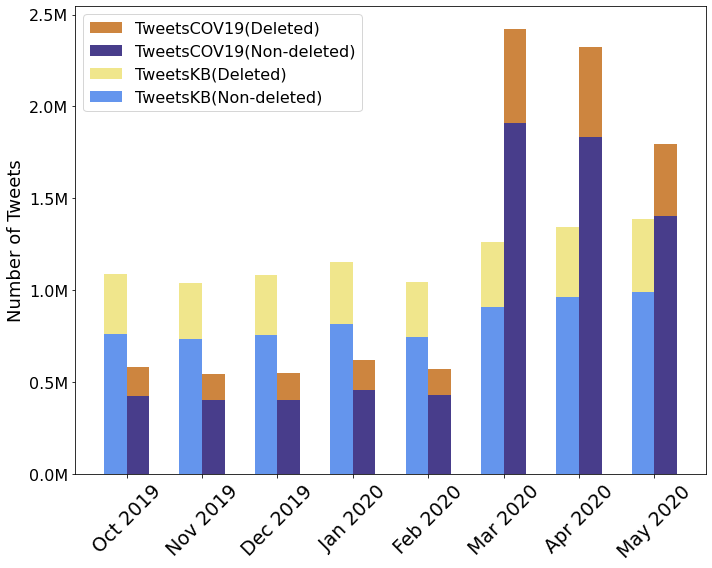

In [18]:
plot_tweets_pro_monat_en(list(undel_dic_cov19.values()), list(del_dic_cov19.values()), list(undel_dic_kb.values()), list(del_dic_kb.values()),  [ 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020'])


***

## Number of intersected Tweets between both datasets

***

In [19]:
df = pd.merge(df_tweetscov19, df_tweetskb, on='Tweet_Id', how="inner")

In [23]:
print('Number of intersected Tweets: ', df.shape[0])

Number of intersected Tweets:  466474


***

## Number of deleted Tweets per user in both datasets

***

In [38]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [40]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_deleted', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_deleted,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [31]:
def number_of_deleted_tweets(df):
    
    User_nur_0 = 0
    User_nur_1 = 0
    User_nur_2 = 0
    User_between_3_5 = 0
    User_between_5_10 = 0
    User_between_10_15 = 0
    User_between_15_20 = 0
    User_between_20_25 = 0
    User_between_25_30 = 0
    User_between_30_35 = 0
    User_between_35_40 = 0
    User_between_40_45 = 0
    User_between_45_50 = 0
    User_between_50_55 = 0
    User_between_55_60 = 0
    User_mehr_als_60 = 0
    
    for key, value in df.num_deleted.items():

        #if key <10 :
            #print (key, value)
            
        if value == 1 :
            User_nur_1 = User_nur_1 + 1
        if value == 2 :
            User_nur_2 = User_nur_2 + 1
        if value > 2 and value <= 5 :
            User_between_3_5 = User_between_3_5 + 1
        if value > 5 and value <= 10 :
            User_between_5_10 = User_between_5_10 + 1
        if value > 10 and value <= 15 :
            User_between_10_15 = User_between_10_15 + 1
        if value > 15 and value <= 20 :
            User_between_15_20 = User_between_15_20 + 1
        if value > 20 and value <= 25 :
            User_between_20_25 = User_between_20_25 + 1
        if value > 25 and value <= 30 :
            User_between_25_30 = User_between_25_30 + 1
        if value > 30 and value <= 35 :
            User_between_30_35 = User_between_30_35 + 1
        if value > 35 and value <= 40 :
            User_between_35_40 = User_between_35_40 + 1
        if value > 40 and value <= 45 :
            User_between_40_45 = User_between_45_50 + 1
        if value > 45 and value <= 50 :
            User_between_45_50 = User_between_45_50 + 1
        if value > 50 and value <= 55 :
            User_between_50_55 = User_between_50_55 + 1
        if value > 55 and value <= 60 :
            User_between_55_60 = User_between_55_60 + 1
        if value >= 60 :
            User_mehr_als_60 = User_mehr_als_60 + 1
            
    List_number_of_tweeets = []
    List_number_of_tweeets.append(User_nur_1)
    List_number_of_tweeets.append(User_nur_2)
    List_number_of_tweeets.append(User_between_3_5)
    List_number_of_tweeets.append(User_between_5_10)
    List_number_of_tweeets.append(User_between_10_15)
    List_number_of_tweeets.append(User_between_15_20)
    List_number_of_tweeets.append(User_between_20_25)
    List_number_of_tweeets.append(User_between_25_30)
    List_number_of_tweeets.append(User_between_30_35)
    List_number_of_tweeets.append(User_between_35_40)
    List_number_of_tweeets.append(User_between_40_45)
    List_number_of_tweeets.append(User_between_45_50)
    List_number_of_tweeets.append(User_between_50_55)
    List_number_of_tweeets.append(User_between_55_60)
    List_number_of_tweeets.append(User_mehr_als_60)
    return List_number_of_tweeets

In [46]:
def plot_gelöschte_tweets_pero_Benutzer(list_1, list_2, title):
    gelöschte_tweets_pero_Benutzer = list_1

    list_3 = []
    for i in range(0, len(gelöschte_tweets_pero_Benutzer)):
        list_3.append((gelöschte_tweets_pero_Benutzer[i]/4095876) * 100)
        
    x = np.arange(len(list_2))
    w = 1
    plt.rcParams["figure.figsize"] = [8,6]
    fig, ax = plt.subplots()

    ax.bar(x, list_3, w, label='Number of useres', color='mediumslateblue')
    ax.yaxis.set_major_formatter(tick.PercentFormatter())
    ax.set_ylabel('Percentage of users ', fontweight="bold")
    ax.set_xlabel('Number of tweets ', fontweight="bold")
    #ax.set_title('Anzahl der geloschten Tweets von Benutzern', fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(list_2, fontsize=12,  rotation='45')
    ax.legend()

    fig.tight_layout()
    plt.savefig('../plots/'+title+'.pdf')
    plt.show()


[814737, 132810, 88258, 26023, 7121, 3299, 1784, 1053, 724, 505, 293, 292, 263, 179, 1616]


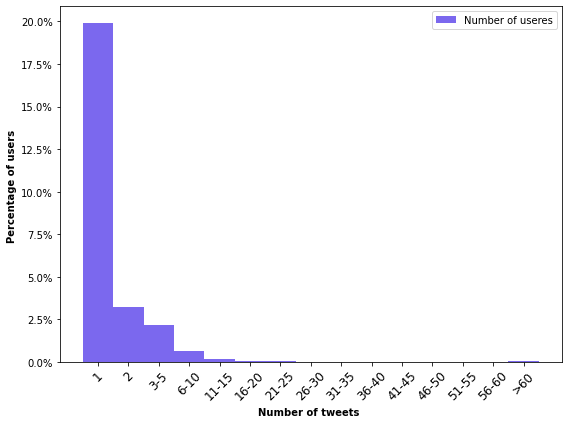

In [47]:

df_tweetscov19_uniqusers_num_deleted = df_tweetscov19_alltweets_reputation_deletionratio.drop_duplicates(subset=["Username"])

df_tweetscov19_uniqusers_num_deleted = df_tweetscov19_uniqusers_num_deleted[['num_deleted']]
List_number_of_tweeets = number_of_deleted_tweets(df_tweetscov19_uniqusers_num_deleted)
print(List_number_of_tweeets)

plot_gelöschte_tweets_pero_Benutzer(List_number_of_tweeets, [ '1', '2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60', '>60'], 'Barplot_tweetscov19_number_of_deleted_tweets_pro_benutzer')

[1214905, 199724, 129173, 34238, 8271, 3320, 1763, 898, 632, 420, 244, 246, 217, 134, 803]


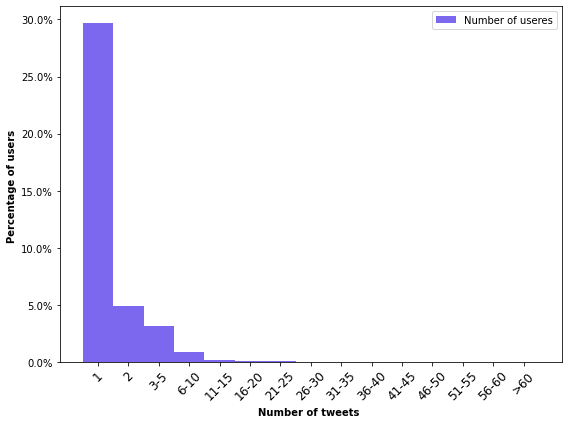

In [48]:
df_tweetskb_uniqusers_num_deleted = df_tweetskb_alltweets_reputation_deletionratio.drop_duplicates(subset=["Username"])

df_tweetskb_uniqusers_num_deleted = df_tweetskb_uniqusers_num_deleted[['num_deleted']]
List_number_of_tweeets = number_of_deleted_tweets(df_tweetskb_uniqusers_num_deleted)
print(List_number_of_tweeets)

plot_gelöschte_tweets_pero_Benutzer(List_number_of_tweeets, [ '1', '2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60', '>60'], 'Barplot_tweetskb_number_of_deleted_tweets_pro_benutzer')

****

In [17]:
df_tweetscov19 = df_tweetscov19[['Tweet_Id', 'Username', 'Timestamp', 'Is_deleted',  'Domains']]

In [18]:
df_tweetscov19.head()

,Tweet_Id,Username,Timestamp,Is_deleted,Domains
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,2019-09-30 22:00:01+00:00,True,0
1,1178791641601232896,627f7d4ef584ba33a676a4ebcb861cdb,2019-09-30 22:00:02+00:00,False,catholicnewsagency.com
2,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,2019-09-30 22:00:03+00:00,False,0
3,1178791644214235137,f17996c036ed4cd981f5448fe00d9ed2,2019-09-30 22:00:03+00:00,False,0
4,1178791645371875329,32a54e5f6d8a67de1bffd2e689594dc8,2019-09-30 22:00:03+00:00,False,0


In [24]:
df_tweetscov19_beforlockdown = df_tweetscov19[df_tweetscov19['Timestamp'] < '2020-03-01 00:00:00+00:00']
df_tweetscov19_beforlockdown.shape

(2867084, 5)

In [23]:
df_tweetscov19_afterlockdown = df_tweetscov19[df_tweetscov19['Timestamp'] >= '2020-03-01 00:00:00+00:00']
df_tweetscov19_afterlockdown.shape

(6542757, 5)

In [15]:
df_tweetscov19_october2019 = df_tweetscov19[df_tweetscov19['Timestamp'] < '2019-11-01 00:00:00+00:00']
df_tweetscov19_october2019.shape

(582828, 5)

In [13]:
start_date = '2019-11-01 00:00:00+00:00'
end_date = '2019-12-01 00:00:00+00:00'
df_tweetscov19_november2019 = df_tweetscov19[(df_tweetscov19['Timestamp'] >= start_date) & (df_tweetscov19['Timestamp'] < end_date) ]
df_tweetscov19_november2019.shape

(543328, 5)

In [9]:
start_date = '2019-12-01 00:00:00+00:00'
end_date = '2020-01-01 00:00:00+00:00'
df_tweetscov19_december2019 = df_tweetscov19[(df_tweetscov19['Timestamp'] >= start_date) & (df_tweetscov19['Timestamp'] < end_date) ]
df_tweetscov19_december2019.shape

(549828, 5)

In [23]:
start_date = '2020-01-01 00:00:00+00:00'
end_date = '2020-02-01 00:00:00+00:00'
df_tweetscov19_januar2020 = df_tweetscov19[(df_tweetscov19['Timestamp'] >= start_date) & (df_tweetscov19['Timestamp'] < end_date) ]
df_tweetscov19_januar2020.shape

(618367, 5)

In [21]:
start_date = '2020-02-01 00:00:00+00:00'
end_date = '2020-03-01 00:00:00+00:00'
df_tweetscov19_februar2020 = df_tweetscov19[df_tweetscov19['Timestamp'] >= start_date] 
df_tweetscov19_februar2020 = df_tweetscov19_februar2020[df_tweetscov19_februar2020['Timestamp'] < end_date]
df_tweetscov19_februar2020.shape

(572733, 5)

In [25]:
start_date = '2020-03-01 00:00:00+00:00'
end_date = '2020-04-01 00:00:00+00:00'
df_tweetscov19_maerz2020 = df_tweetscov19[df_tweetscov19['Timestamp'] >= start_date]
df_tweetscov19_maerz2020 = df_tweetscov19_maerz2020[df_tweetscov19_maerz2020['Timestamp'] < end_date ]
df_tweetscov19_maerz2020.shape

(2423340, 5)

In [27]:
start_date = '2020-04-01 00:00:00+00:00'
end_date = '2020-05-01 00:00:00+00:00'
df_tweetscov19_April2020 = df_tweetscov19[df_tweetscov19['Timestamp'] >= start_date]
df_tweetscov19_April2020 = df_tweetscov19_April2020[df_tweetscov19_April2020['Timestamp'] < end_date ]
df_tweetscov19_April2020.shape

(2321998, 5)

In [29]:
start_date = '2020-05-01 00:00:00+00:00'
#end_date = '2020-05-01 00:00:00+00:00'
df_tweetscov19_mai2020 = df_tweetscov19[df_tweetscov19['Timestamp'] >= start_date ]
df_tweetscov19_mai2020.shape

(1797419, 5)

In [30]:
path = '../data/df_tweetscov19_mai2020.tsv'

with open(path, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetscov19_mai2020.iterrows():
        tsv_writer.writerow(row.values.tolist())

****

# TweetsKB

In [4]:
df_tweetskb = df_tweetskb[['Tweet_Id', 'Username', 'Timestamp', 'Is_deleted',  'Domains']]
df_tweetskb.head()

,Tweet_Id,Username,Timestamp,Is_deleted,Domains
0,1178791636039589889,DCComics,2019-09-30 22:00:01+00:00,False,dcuniverseinfinite.com
1,1178791641265639424,seanberdyz,2019-09-30 22:00:02+00:00,True,carrd.co
2,1178791640573579264,AnArtistAtBirth,2019-09-30 22:00:02+00:00,True,0
3,1178791644797255680,lagosboygang,2019-09-30 22:00:03+00:00,True,0
4,1178791648056217600,Phenom_Hoops,2019-09-30 22:00:04+00:00,False,phenomhoopreport.com


In [32]:
df_tweetskb_beforlockdown = df_tweetskb[df_tweetskb['Timestamp'] < '2020-03-01 00:00:00+00:00']
df_tweetskb_beforlockdown.shape

(5412263, 5)

In [5]:
df_tweetskb_afterlockdown = df_tweetskb[df_tweetskb['Timestamp'] >= '2020-03-01 00:00:00+00:00']
df_tweetskb_afterlockdown.shape

(3997578, 5)

In [35]:
df_tweetskb_october2019 = df_tweetskb[df_tweetskb['Timestamp'] < '2019-11-01 00:00:00+00:00']
df_tweetskb_october2019.shape

(1091989, 5)

In [40]:
start_date = '2019-11-01 00:00:00+00:00'
end_date = '2019-12-01 00:00:00+00:00'
df_tweetskb_november2019 = df_tweetskb[(df_tweetskb['Timestamp'] >= start_date) & (df_tweetskb['Timestamp'] < end_date) ]
df_tweetskb_november2019.shape

(1041247, 5)

In [45]:
start_date = '2019-12-01 00:00:00+00:00'
end_date = '2020-01-01 00:00:00+00:00'
df_tweetskb_december2019 = df_tweetskb[(df_tweetskb['Timestamp'] >= start_date) & (df_tweetskb['Timestamp'] < end_date) ]
df_tweetskb_december2019.shape

(1082048, 5)

In [47]:
start_date = '2020-01-01 00:00:00+00:00'
end_date = '2020-02-01 00:00:00+00:00'
df_tweetskb_januar2020 = df_tweetscov19[(df_tweetskb['Timestamp'] >= start_date) & (df_tweetskb['Timestamp'] < end_date) ]
df_tweetskb_januar2020.shape

(1152147, 5)

In [49]:
start_date = '2020-02-01 00:00:00+00:00'
end_date = '2020-03-01 00:00:00+00:00'
df_tweetskb_februar2020 = df_tweetskb[df_tweetskb['Timestamp'] >= start_date] 
df_tweetskb_februar2020 = df_tweetskb_februar2020[df_tweetskb_februar2020['Timestamp'] < end_date]
df_tweetskb_februar2020.shape

(1044832, 5)

In [51]:
start_date = '2020-03-01 00:00:00+00:00'
end_date = '2020-04-01 00:00:00+00:00'
df_tweetskb_maerz2020 = df_tweetskb[df_tweetskb['Timestamp'] >= start_date]
df_tweetskb_maerz2020 = df_tweetskb_maerz2020[df_tweetskb_maerz2020['Timestamp'] < end_date ]
df_tweetskb_maerz2020.shape

(1261243, 5)

In [53]:
start_date = '2020-04-01 00:00:00+00:00'
end_date = '2020-05-01 00:00:00+00:00'
df_tweetskb_April2020 = df_tweetskb[df_tweetskb['Timestamp'] >= start_date]
df_tweetskb_April2020 = df_tweetskb_April2020[df_tweetskb_April2020['Timestamp'] < end_date ]
df_tweetskb_April2020.shape

(1346895, 5)

In [55]:
start_date = '2020-05-01 00:00:00+00:00'
#end_date = '2020-05-01 00:00:00+00:00'
df_tweetskb_mai2020 = df_tweetskb[df_tweetskb['Timestamp'] >= start_date ]
df_tweetskb_mai2020.shape

(1389440, 5)

In [6]:
path = '../data/df_tweetskb_afterlockdown.tsv'

with open(path, 'w', newline='', encoding="utf-8") as out_file:
    tsv_writer = csv.writer(out_file, delimiter="\t")
    for idx, row in df_tweetskb_afterlockdown.iterrows():
        tsv_writer.writerow(row.values.tolist())